In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
import joblib

## Error Visible Calculation &  Input Data

In [7]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')
train_dataset.head()

,new_case,yesterday_new_cas,first_case_time,date,case,population,stay_at_home,50_gatherings,500_gatherings,public_schools,restaurant,entertainment/gym,Federal_guidelines,foreign_travel_ban
0,2,1,123,198,98,42831,0,0,0,1,1,1,1,1
1,0,0,124,186,7,7110,0,1,1,1,1,1,1,1
2,68,89,107,266,10752,311522,1,1,1,1,1,1,1,1
3,-1,1,114,199,85,55101,1,1,1,1,1,1,1,1
4,3,0,110,121,13,42950,0,0,0,0,1,1,1,1


## K-Neighbor Regressor

In [3]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(train_features, train_labels)
s_knr = r2_score(train_labels,knr.predict(train_features))
s_knr_test = r2_score(test_labels,knr.predict(test_features))
print(s_knr,s_knr_test)

0.8817647074831572 0.7514510438415237


K-Neighbour Regressor seems good

## N Number Study

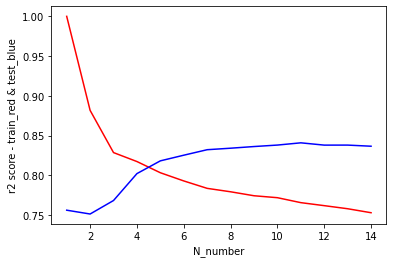

In [4]:
N_number = []
train_pred_score =[]
test_pred_score =[]
for i in range(1,15):
    N_number.append(i)
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_features ,train_labels)
    s_knr_reg = r2_score(train_labels,knr.predict(train_features))
    s_knr_reg_test = r2_score(test_labels,knr.predict(test_features))
    train_pred_score.append(s_knr_reg)
    test_pred_score.append(s_knr_reg_test)
plt.plot(N_number, train_pred_score,'r')
plt.plot(N_number, test_pred_score,'b')
plt.xlabel('N_number')
plt.ylabel('r2 score - train_red & test_blue')
plt.show()

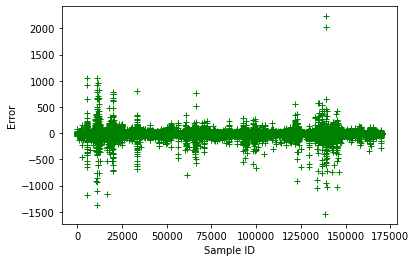

DescribeResult(nobs=170144, minmax=(0.0, 2232.0), mean=5.784616895940245, variance=701.373577587254, skewness=23.186369780944485, kurtosis=993.6304169547317)

In [12]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(train_features ,train_labels)
test_predict = knr.predict(test_features)
test_labels = test_labels.to_numpy()

error,abserror = errorCalculate(test_labels,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [13]:
r2_score(test_labels,knr.predict(test_features))

0.8323042173789859

In [14]:
filename = 'covid_KNeighborRegressor.sav'
joblib.dump(knr, filename)

['covid_KNeighborRegressor.sav']

DescribeResult(nobs=170144, minmax=(0.0, 3008.8), mean=5.76156314651119, variance=746.3546472712105, skewness=29.928749244945305, kurtosis=1960.7951491136096